In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

image_size = (224, 268)
cropped_image_size = (224, 224)
batch_size = 32
buffer_size = 4
test_path = './test_data'

def parse_image(filename):
    parts = tf.strings.split(filename, os.sep)
    label = float(parts[-2])
    image = tf.io.read_file(filename)
    image = tf.image.decode_png(image)
    image = tf.image.resize(image, image_size)
    return image, label

test_list_ds = tf.data.Dataset.list_files(str(test_path + os.sep + "*" + os.sep + "*.png")).shuffle(1000)
test_ds = test_list_ds.map(parse_image).batch(batch_size)
test_ds = test_ds.prefetch(buffer_size=buffer_size).cache()

model = keras.models.load_model('./simple_regression_trained_model')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 224, 268, 1)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 268, 1)       0         
_________________________________________________________________
center_crop (CenterCrop)     (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 224)     258272    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 224)       0

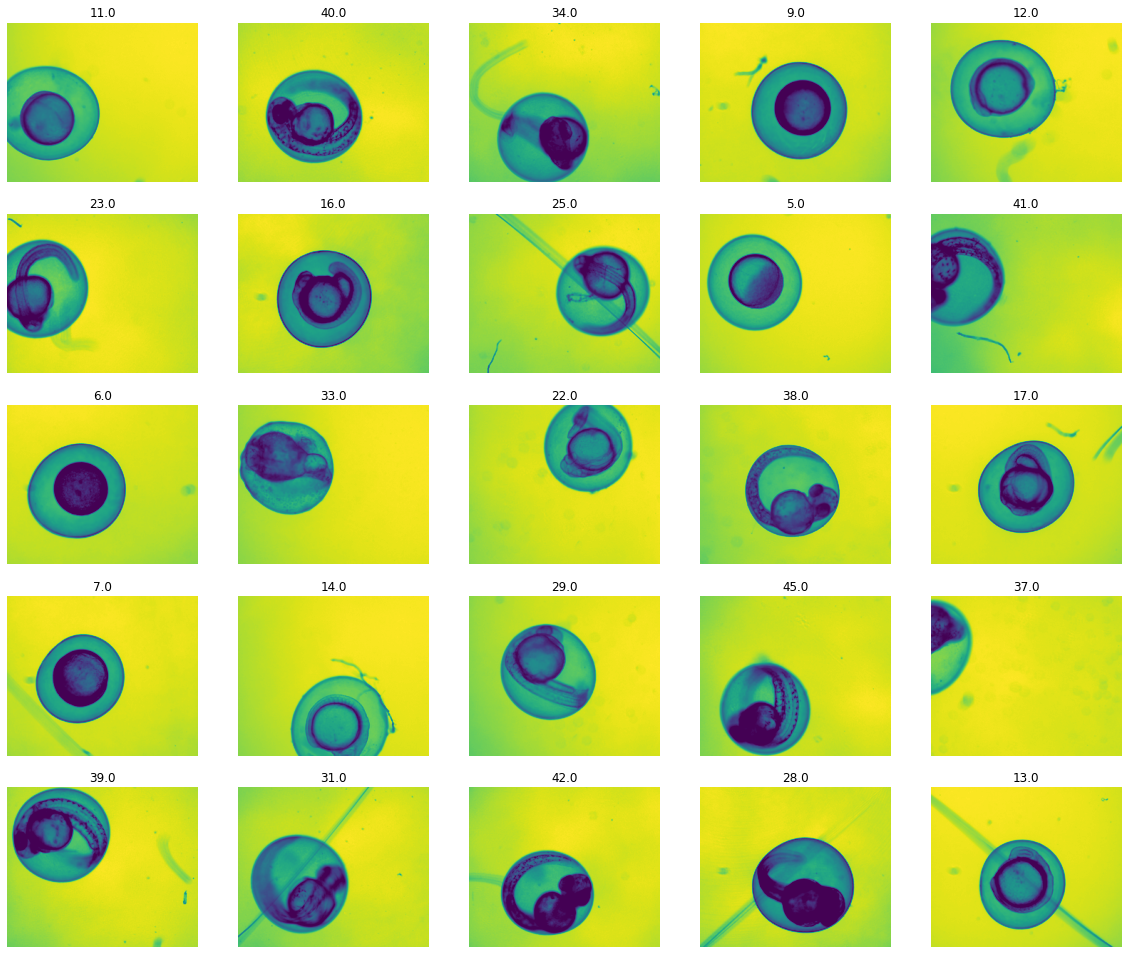

In [6]:
%matplotlib inline

plt.figure(num=3, figsize=(20, 17))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap='gray')
        plt.title(labels[i].numpy())
        plt.axis("off")
plt.show()

In [2]:
score = model.evaluate(test_ds, verbose=1)
print("Test loss:", score)

2/2 [==============================] - 1s 523ms/step - loss: 18.0320
Test loss: 18.031984329223633


1/1 [==============================] - 0s 96ms/step


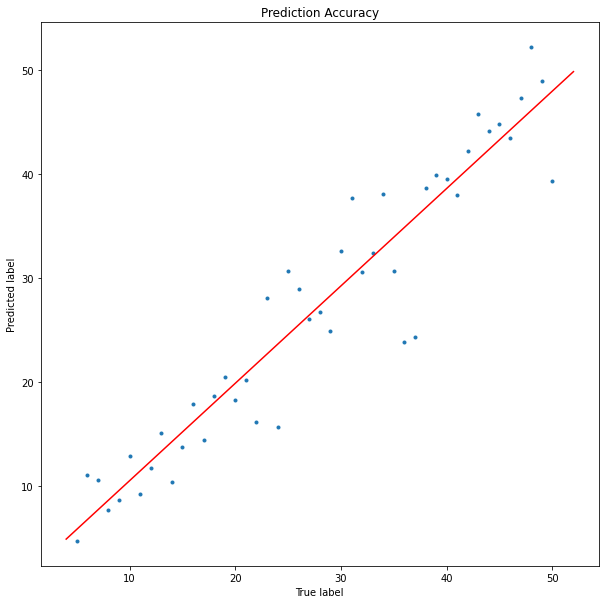

In [3]:
labels = np.array([])
predictions = np.array([])
for x, y in test_ds:
    p = model.predict(x, verbose=1)
    for i in range(len(p)):
        predictions = np.concatenate([predictions, p[i]])
    labels = np.concatenate([labels, y.numpy()])

linear_model = np.polyfit(labels, predictions, 1)
linear_model_fn = np.poly1d(linear_model)
x_s = np.arange(4, 53)

plt.figure(num=2, figsize=(10, 10))
plt.title("Prediction Accuracy")
plt.plot(labels, predictions, 'o', markersize=3)
plt.plot(x_s, linear_model_fn(x_s), color="red")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

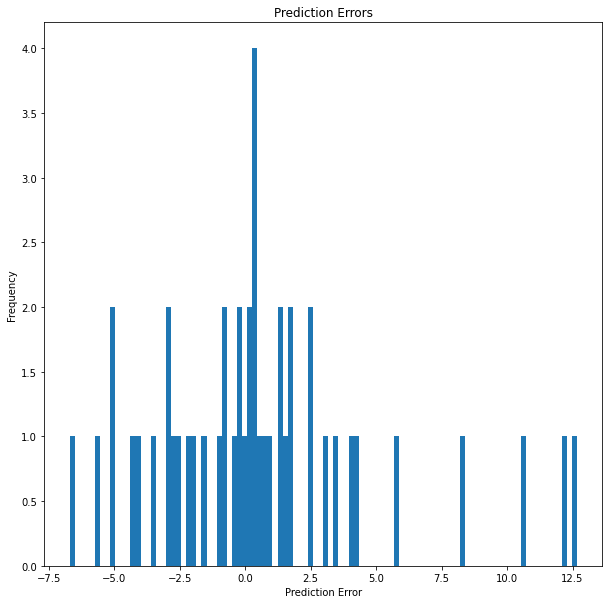

In [4]:
errs = labels - predictions

plt.figure(num=4, figsize=(10, 10))
plt.title("Prediction Errors")
plt.hist(errs, bins=100)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()